##**Previsão de radiação solar**

---
Estes conjuntos de dados são dados meteorológicos da estação meteorológica HI-SEAS de quatro meses (setembro a dezembro de 2016) entre a Mission IV e Mission V da NASA, e que são fornecidas pela www.kaggle.com (https://www.kaggle.com/dronio/SolarEnergy). A data time_t do UNIX (segundos desde 1º de janeiro de 1970). Útil para classificar os resultados desta exportação com os resultados de outras exportações
A data no formato aaaa-mm-dd
A hora local do dia no formato de 24 horas hh: mm: ss.

As unidades de cada conjunto de dados são:

Radiação solar: watts por metro ^ 2

Temperatura: graus Fahrenheit

Umidade: por cento

Pressão barométrica: Hg

Direção do vento: graus

Velocidade do vento: milhas por hora

Time: hora



Sunrise/sunset: Hawaii time



In [ ]:
#Librerias 
import pandas as pd
import seaborn as sns
import plotly.express as px 
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# upload direito do Drive
from google.colab import files
path = "/content/drive/MyDrive/Especializacao /Regressao/SolarPrediction.csv"
df = pd.read_csv(path)
print(df.shape)
df.head(6)

(32686, 11)


,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00
5,1475227824,9/29/2016 12:00:00 AM,23:30:24,1.21,48,30.46,64,120.20,5.62,06:13:00,18:13:00


In [ ]:
# Discretizar os tempos em faixas horarios no longo do día

##**Exploração de dados**

In [ ]:
df.dtypes

UNIXTime                    int64
Data                       object
Time                       object
Radiation                 float64
Temperature                 int64
Pressure                  float64
Humidity                    int64
WindDirection(Degrees)    float64
Speed                     float64
TimeSunRise                object
TimeSunSet                 object
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Data                    32686 non-null  object 
 2   Time                    32686 non-null  object 
 3   Radiation               32686 non-null  float64
 4   Temperature             32686 non-null  int64  
 5   Pressure                32686 non-null  float64
 6   Humidity                32686 non-null  int64  
 7   WindDirection(Degrees)  32686 non-null  float64
 8   Speed                   32686 non-null  float64
 9   TimeSunRise             32686 non-null  object 
 10  TimeSunSet              32686 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 2.7+ MB


In [ ]:
#conversao de variaveis
df['Data']=pd.to_datetime(df['Data'])

In [ ]:
df.dtypes

UNIXTime                           int64
Data                      datetime64[ns]
Time                              object
Radiation                        float64
Temperature                        int64
Pressure                         float64
Humidity                           int64
WindDirection(Degrees)           float64
Speed                            float64
TimeSunRise                       object
TimeSunSet                        object
dtype: object

In [ ]:
# Estadística 
df1= df.drop(['UNIXTime'], axis=1)
df1.describe()

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
count,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000
mean,207.124697,51.103255,30.422879,75.016307,143.489821,6.243869
std,315.916387,6.201157,0.054673,25.990219,83.167500,3.490474
min,1.110000,34.000000,30.190000,8.000000,0.090000,0.000000
25%,1.230000,46.000000,30.400000,56.000000,82.227500,3.370000
50%,2.660000,50.000000,30.430000,85.000000,147.700000,5.620000
75%,354.235000,55.000000,30.460000,97.000000,179.310000,7.870000
max,1601.260000,71.000000,30.560000,103.000000,359.950000,40.500000


In [ ]:
# Estadística 
df['Radiation'].describe()

count    32686.000000
mean       207.124697
std        315.916387
min          1.110000
25%          1.230000
50%          2.660000
75%        354.235000
max       1601.260000
Name: Radiation, dtype: float64

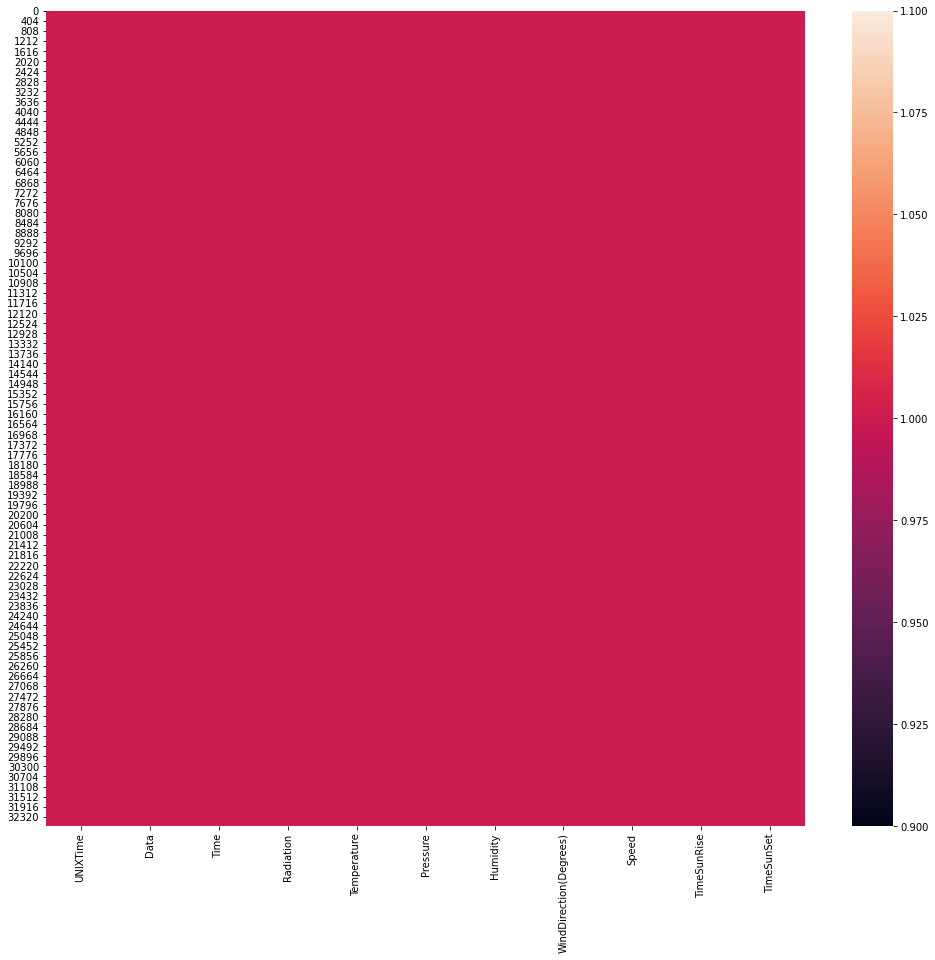

In [ ]:
# Verficacao de valores null
f, ax = plt.subplots(figsize=(17, 15))
ax = sns.heatmap(df.notna())

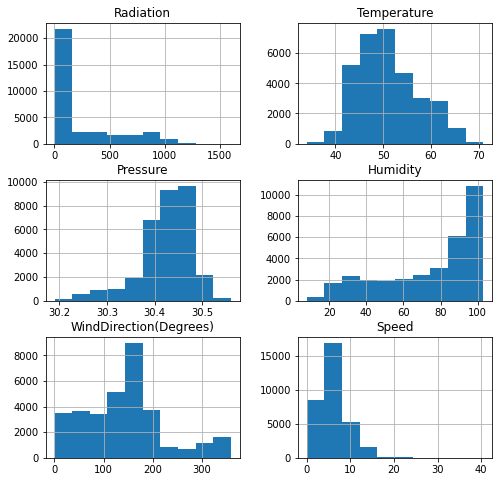

In [ ]:
df1= df.drop(['UNIXTime'], axis=1)
df1.hist(figsize=[8,8])
plt.show()

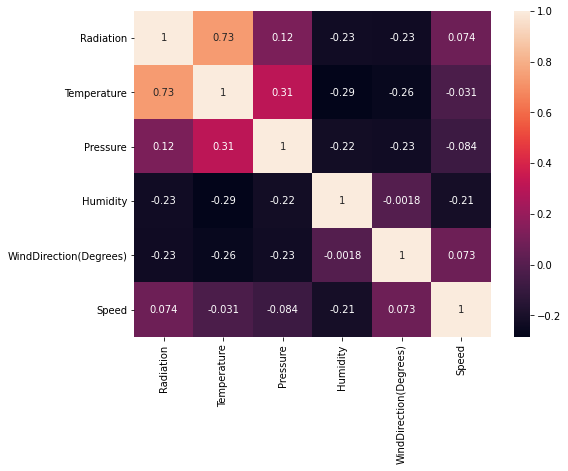

In [ ]:
# Correlação Pearson
df1= df.drop(['UNIXTime'], axis=1)
corr_df = df1.corr(method='pearson')
plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()

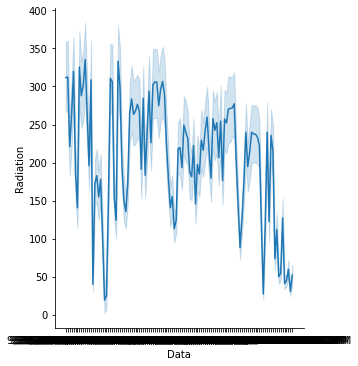

In [ ]:
sns.relplot(x = "Data", y = "Radiation", data = df, kind = "line");

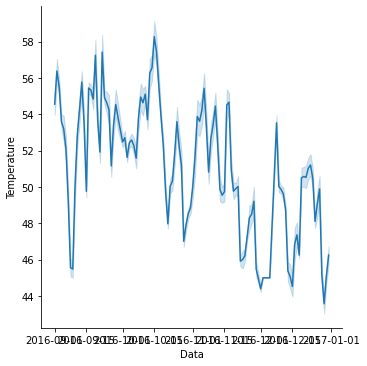

In [ ]:
sns.relplot(x = "Data", y = "Temperature", data = df, kind = "line");

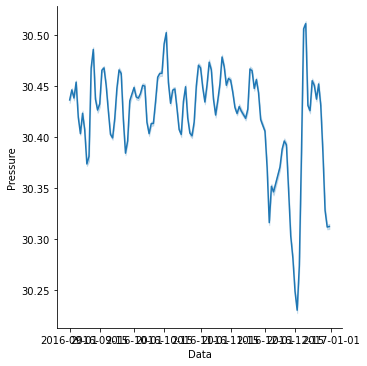

In [ ]:
sns.relplot(x = "Data", y = "Pressure", data = df, kind = "line");

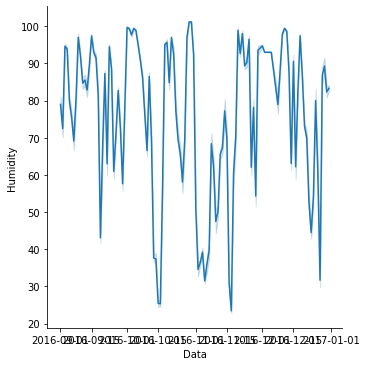

In [ ]:
sns.relplot(x = "Data", y = "Humidity", data = df, kind = "line");

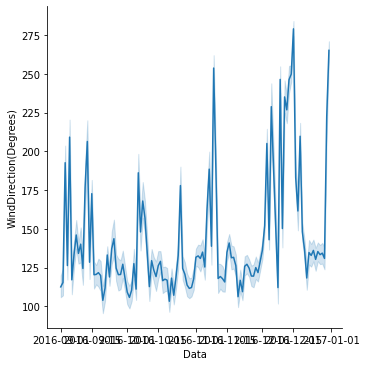

In [ ]:
sns.relplot(x = "Data", y = "WindDirection(Degrees)", data = df, kind = "line");


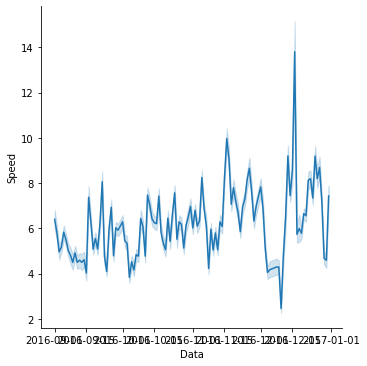

In [ ]:
sns.relplot(x = "Data", y = "Speed", data = df, kind = "line");

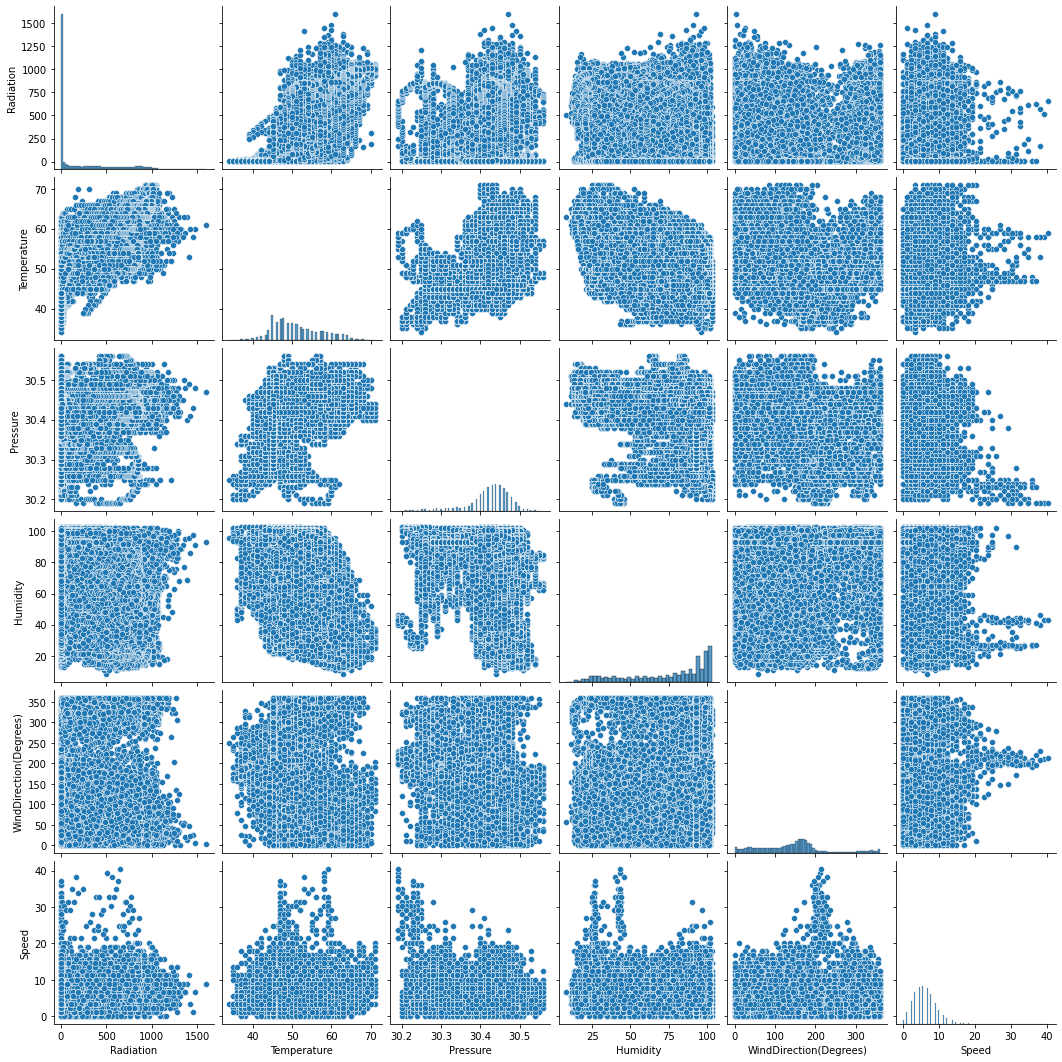

In [ ]:
#visualização e distribuição univariada de todas as variáveis
df1= df.drop(['UNIXTime'], axis=1)
sns.pairplot(df1)

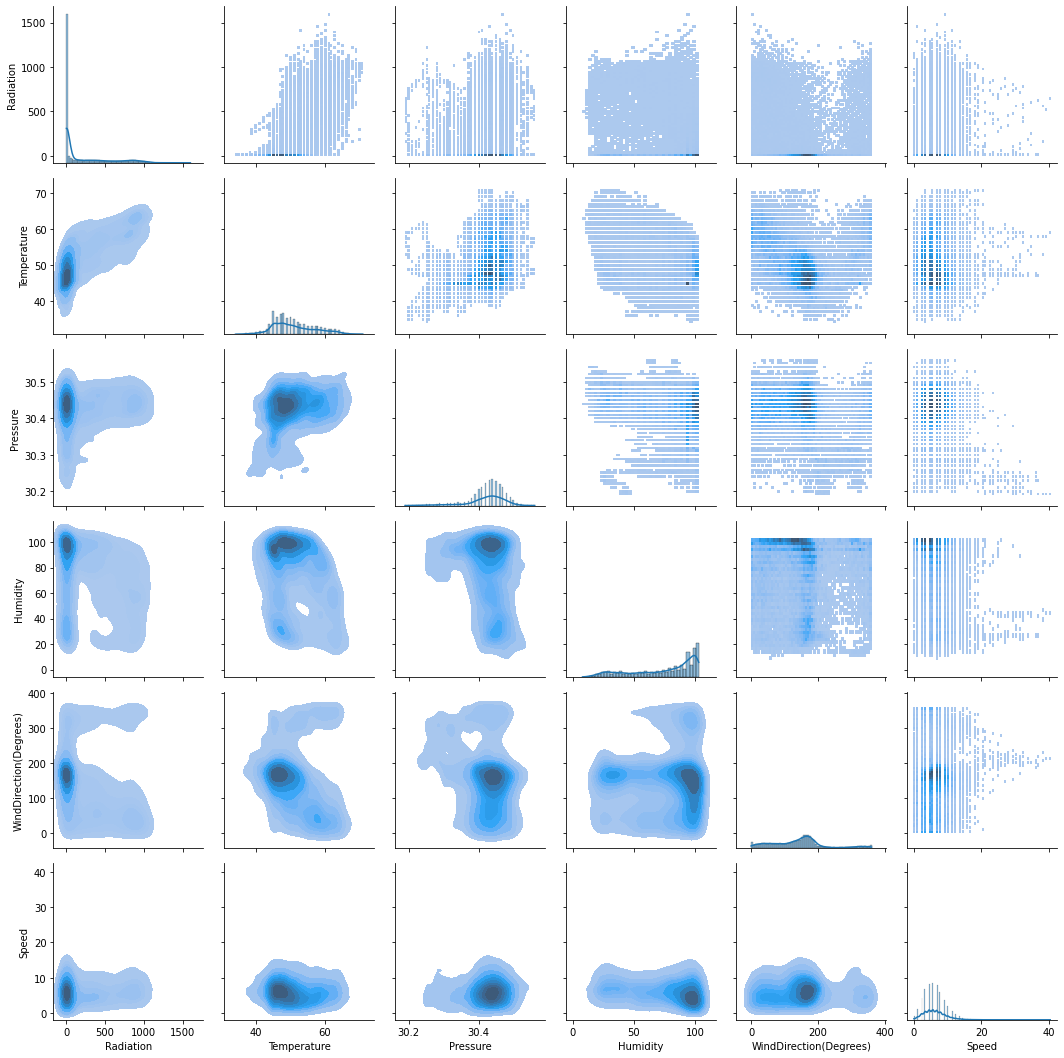

In [ ]:
g = sns.PairGrid(df1)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)

In [ ]:
df.columns

Index(['UNIXTime', 'Data', 'Time', 'Radiation', 'Temperature', 'Pressure',
       'Humidity', 'WindDirection(Degrees)', 'Speed', 'TimeSunRise',
       'TimeSunSet'],
      dtype='object')

In [ ]:
# upload direito do Drive
from google.colab import files
path2 = "/content/drive/MyDrive/Especializacao /Regressao/Regressao 1/df_train_01.csv"
path3 = "/content/drive/MyDrive/Especializacao /Regressao/Regressao 1/df_test_01.csv" 
df_train = pd.read_csv(path2)
df_test = pd.read_csv(path3)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
print(df_train.shape)
df_train.head(6)

(26003, 7)


,R,T,P,H,W,S,Hr
0,1.20,47,30.46,38,163.01,14.62,11.333333
1,786.71,69,30.48,25,27.09,4.50,11.700000
2,362.68,57,30.40,70,16.41,4.50,12.016667
3,1.20,42,30.44,67,183.14,5.62,11.116667
4,1.25,45,30.48,49,158.55,7.87,11.400000
5,1.23,52,30.48,97,184.54,3.37,12.083333


In [ ]:
print(df_test.shape)
df_test.head(6)

(26003, 7)


,R,T,P,H,W,S,Hr
0,1.20,47,30.46,38,163.01,14.62,11.333333
1,786.71,69,30.48,25,27.09,4.50,11.700000
2,362.68,57,30.40,70,16.41,4.50,12.016667
3,1.20,42,30.44,67,183.14,5.62,11.116667
4,1.25,45,30.48,49,158.55,7.87,11.400000
5,1.23,52,30.48,97,184.54,3.37,12.083333


## **Contrucao do Modelo**

### ***Regressao Lineal simples***

Vamos a calcular a relacao de relacao lineal que exitem entre as variaveis preditores com respeito da variavel resposta Radiacao.


O objetivo é entender se UM resultado é dependente ou não independente em relação a UMA variável. A formulação é a seguinte.

y = b1x + b0; b1 = coeficiente, b = intercepto



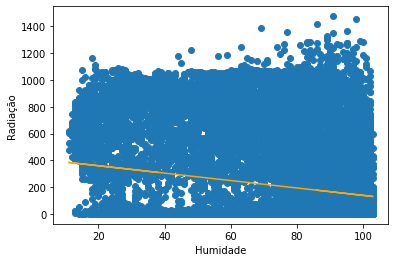

In [ ]:
from sklearn.linear_model import LinearRegression
Linear_Reg = LinearRegression()
x=df_train.H.values.reshape(-1,1)
y=df_train.R.values.reshape(-1,1)
Linear_Reg.fit(x,y)
y_head=Linear_Reg.predict(x)
plt.scatter(df_train.H,df_train.R)
plt.xlabel("Humidade")
plt.ylabel("Radiação")
plt.plot(x,y_head,color="orange")

In [ ]:
from sklearn.metrics import r2_score
print("r2_score",r2_score(y,y_head))

r2_score 0.5964662412785755


##Regressão Múltipla

In [ ]:
from sklearn.linear_model import LinearRegression
Multi_Linear_Reg = LinearRegression()
x=df_train.iloc[:,[1,2,3,4,5,6]].values
y=df_train.R.values.reshape(-1,1)
Multi_Linear_Reg.fit(x,y)
y_head=Multi_Linear_Reg.predict(x)
print("b0:",Multi_Linear_Reg.intercept_)
print("b1,b2,b3,b4,b5 são:",Multi_Linear_Reg.coef_)

b0: [17061.6604927]
b1,b2,b3,b4,b5 são: [[ 4.21794777e+01 -5.80608061e+02  2.48453982e-01 -2.36696066e-01
   8.43204354e+00 -1.20082957e+02]]


In [ ]:
from sklearn.metrics import r2_score
print("r2_score",r2_score(y,y_head))

r2_score 0.5964662412785755


In [ ]:
print(Multi_Linear_Reg.coef_)

[[ 4.21794777e+01 -5.80608061e+02  2.48453982e-01 -2.36696066e-01
   8.43204354e+00 -1.20082957e+02]]


In [ ]:
#Regressão de mínimos quadrados ordinários Ordinary Least Squares regression(OLS)
import statsmodels.api as sm
X = df_train[['T', 'P','H', 'W', 'S','Hr']] # Vareveis preditorias 
Y = df_train['R'] # Variavel resposta
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
est.summary()


#R-squared =  R quadrado
#R-Ajustado
#AIC : Akaike Information Criterion
#BIC : Bayesian Information Criterion
# Omnibus tests  Eles testam se a variância explicada em um conjunto de dados é significativamente maior do que a variância inexplicada , em geral.
# Durbin-Watson: teste de autocorrelação nos resíduos de um modelo estatístico ou análise de regressão . A estatística Durbin-Watson sempre terá um valor variando entre 0 e 4.
# Um valor de 2,0 indica que não há autocorrelação detectada na amostra. 
#Valores de 0 a menos de 2 apontam para autocorrelação positiva e valores de 2 a 4 significam autocorrelação negativa.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.596
Model:                            OLS   Adj. R-squared:                  0.596
Method:                 Least Squares   F-statistic:                     6404.
Date:                Wed, 15 Sep 2021   Prob (F-statistic):               0.00
Time:                        23:07:58   Log-Likelihood:            -1.7488e+05
No. Observations:               26003   AIC:                         3.498e+05
Df Residuals:                   25996   BIC:                         3.498e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.706e+04    794.772     21.467      0.000    1.55e+04    1.86e+04
T             42.1795      0.238    176.913      0.000      41.712      42.647
P           -580.6081     26.346    -22.038      0.000    -632.247    -528.969
H              0.2485      0.054      4.609      0.000       0.143       0.354
W             -0.2367      0.016    -14.912      0.000      -0.268      -0.206
S              8.4320      0.399     21.114      0.000       7.649       9.215
Hr          -120.0830      2.840    -42.283      0.000    -125.650    -114.516
==============================================================================
Omnibus:                     2135.459   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3312.890
Skew:                           0.639   Prob(JB):                         0.00
Kurtosis:                       4.193   Cond. No.                     1.19e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.19e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#Minimos quadrados generalizados
#https://www.statsmodels.org/stable/examples/notebooks/generated/gls.html
model = sm.GLSAR(Y, X, rho=2)
>>> for i in range(6):
...     results = model.fit()
...     print("AR coefficients: {0}".format(model.rho))
...     rho, sigma = sm.regression.yule_walker(results.resid,
...                                            order=model.order)
...     model = sm.GLSAR(Y, X, rho)

AR coefficients: [0. 0.]
AR coefficients: [-0.00482758  0.00350986]
AR coefficients: [-0.00482963  0.00351109]
AR coefficients: [-0.00482963  0.00351109]
AR coefficients: [-0.00482963  0.00351109]
AR coefficients: [-0.00482963  0.00351109]


In [ ]:
results.params

const    17051.244779
T           42.181346
P         -580.267757
H            0.248896
W           -0.236700
S            8.432288
Hr        -120.088100
dtype: float64

In [ ]:
model2 = sm.GLSAR(Y, X, rho=2)
res = model2.iterative_fit(maxiter=6)
model2.rho

array([-0.00482963,  0.00351109])

In [ ]:
#Regressão de quantil
#O modelo LAD Least Absolute Deviation (Desvio Mínimo Absoluto) é um caso especial de regressão de quantis onde q = 0,5
#https://www.statsmodels.org/stable/examples/notebooks/generated/regression_diagnostics.html
# As variaveis escolhidas, sao Temperatura e Radiacao pela relacao de max correlacao
import statsmodels.formula.api as smf
mod = smf.quantreg('R ~ T',  df_train)
res = mod.fit(q=.5)
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                      R   Pseudo R-squared:               0.2181
Model:                       QuantReg   Bandwidth:                       29.09
Method:                 Least Squares   Sparsity:                        467.1
Date:                Thu, 16 Sep 2021   No. Observations:                26003
Time:                        00:04:03   Df Residuals:                    26001
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1496.2617     12.016   -124.527      0.000   -1519.813   -1472.710
T             32.5542      0.233    139.540      0.000      32.097      33.011


Estimamos o modelo de regressão de quantis para muitos quantis entre 0,05 e 0,95 e comparamos a linha de melhor ajuste de cada um desses modelos com os resultados dos Mínimos Quadrados Ordinários.